In [1]:
import numpy as np
import astropy.units as u
import time
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
import poppy
import skimage
from skimage.registration import phase_cross_correlation
import copy
from importlib import reload
import matplotlib.pyplot as plt

import magpyx
from magpyx.utils import ImageStream
import purepyindi
from purepyindi import INDIClient
client0 = purepyindi.INDIClient('localhost', 7624)
client0.start()

from math_module import xp, xcipy, np_array
import utils
import fsm_utils
import cam_utils
from imshows import imshow1, imshow2, imshow3
from matplotlib.patches import Circle

wavelength = 633e-9
fl = 450e-3
fsm_pupil_diam = 7.1e-3
as_per_lamD = (wavelength/fsm_pupil_diam*u.radian).to(u.arcsec)
print(as_per_lamD)

pxscl_lamD = 3.45e-6 / (fl * wavelength/fsm_pupil_diam)
print(1/pxscl_lamD)

thresh = 0.1



/opt/conda/envs/km310gpu/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


18.389524275269295 arcsec
11.62890385793019


# FSM Mod 1Hz

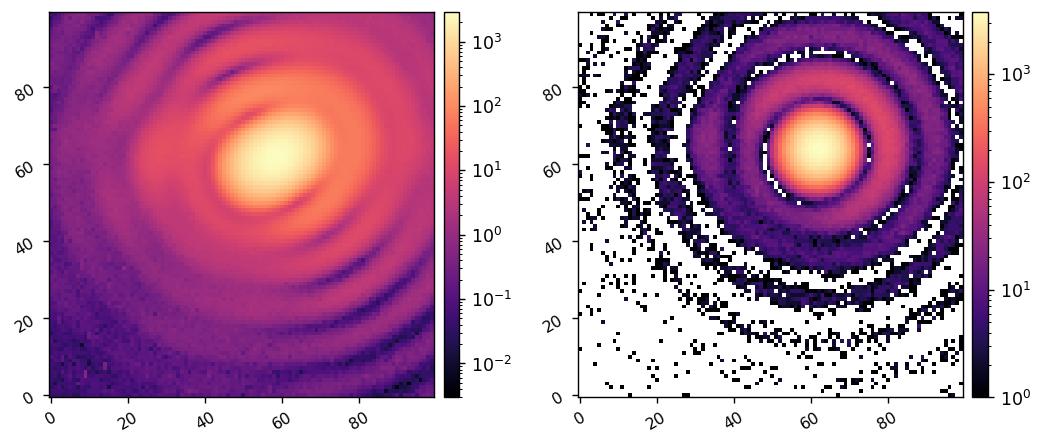

In [2]:
date = 20241118
date = 20241119
freq = 1
data, hdr = utils.load_fits(f'data/sin-mod/{today}_fsm_mod_cube_0.5lamD_{freq:04d}.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)

times = np.linspace(0, data.shape[0]-1, data.shape[0]) / hdr['FPS']

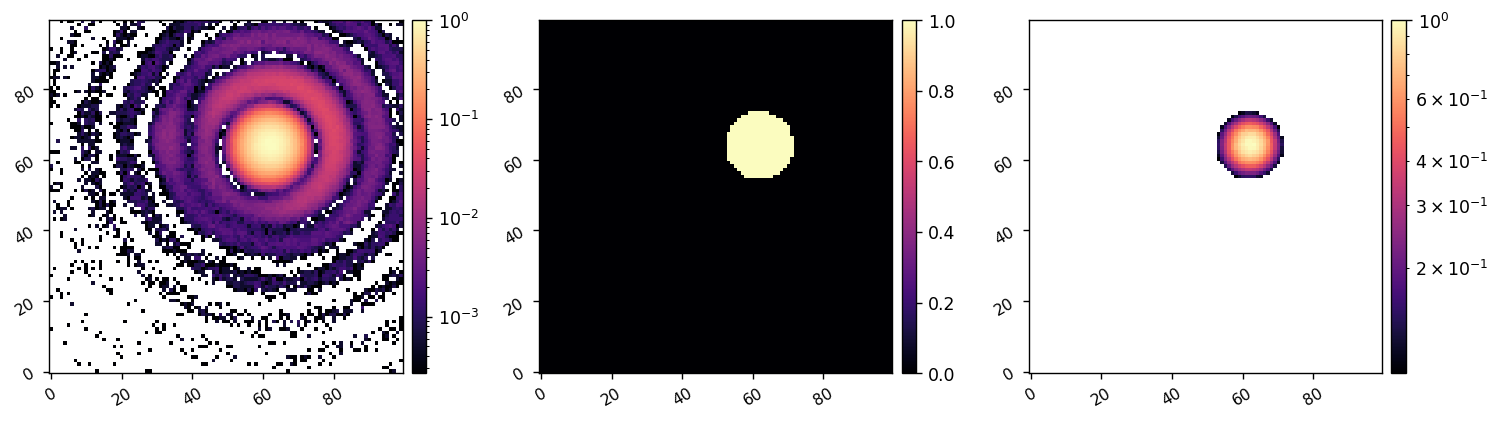

In [3]:
shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

3.3318792495663243 1.8586604309988755


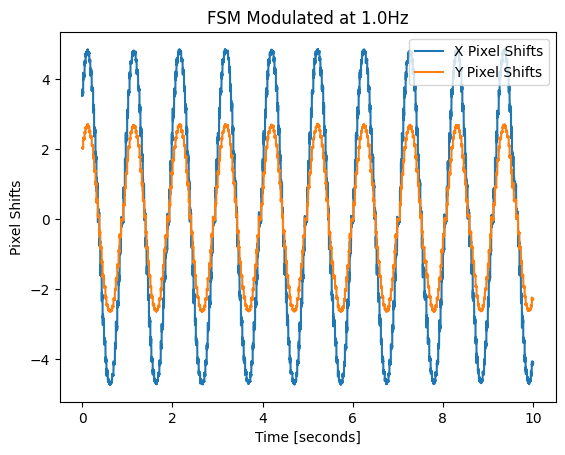

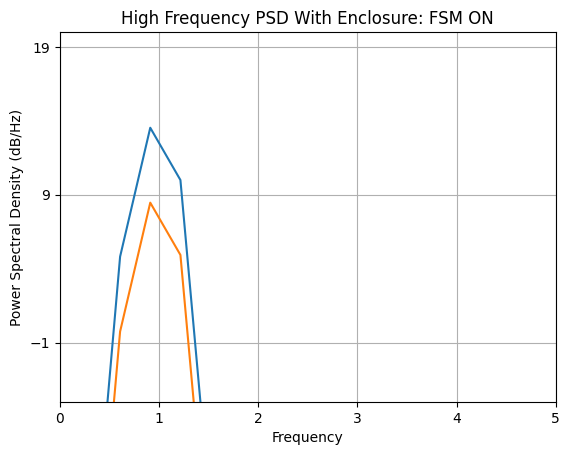

In [8]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(times, shift_pix[:,0], label='X Pixel Shifts')
plt.plot(times, shift_pix[:,1], label='Y Pixel Shifts')
plt.title(f'FSM Modulated at {freq:.1f}Hz')
plt.ylabel('Pixel Shifts')
plt.xlabel('Time [seconds]')
plt.legend()
plt.show()

py, psd_freqs = plt.psd(shift_pix[:,0], Fs=fps, NFFT=1024*4)
px, psd_freqs = plt.psd(shift_pix[:,1], Fs=fps, NFFT=1024*4)
plt.title('High Frequency PSD With Enclosure: FSM ON')
plt.xlim([0, 5])
plt.ylim([-5, 20])
# plt.yticks([-50, -30])
plt.show()


# FSM Mod

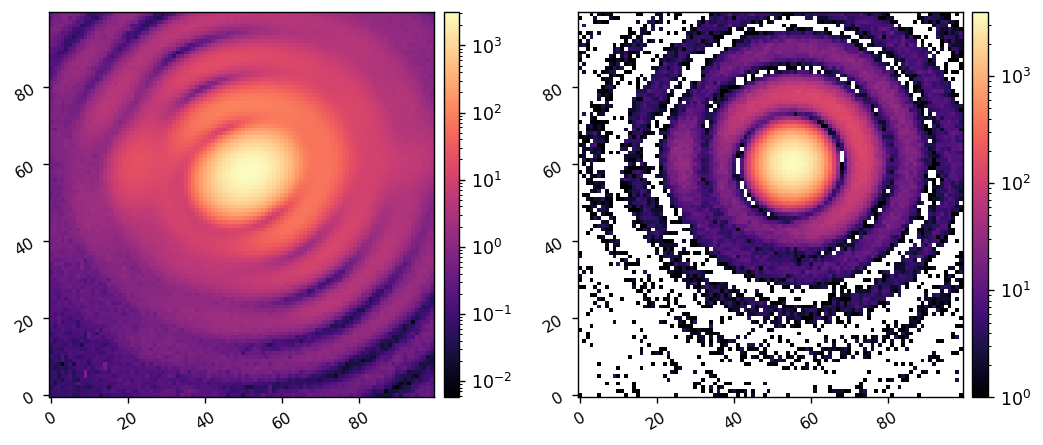

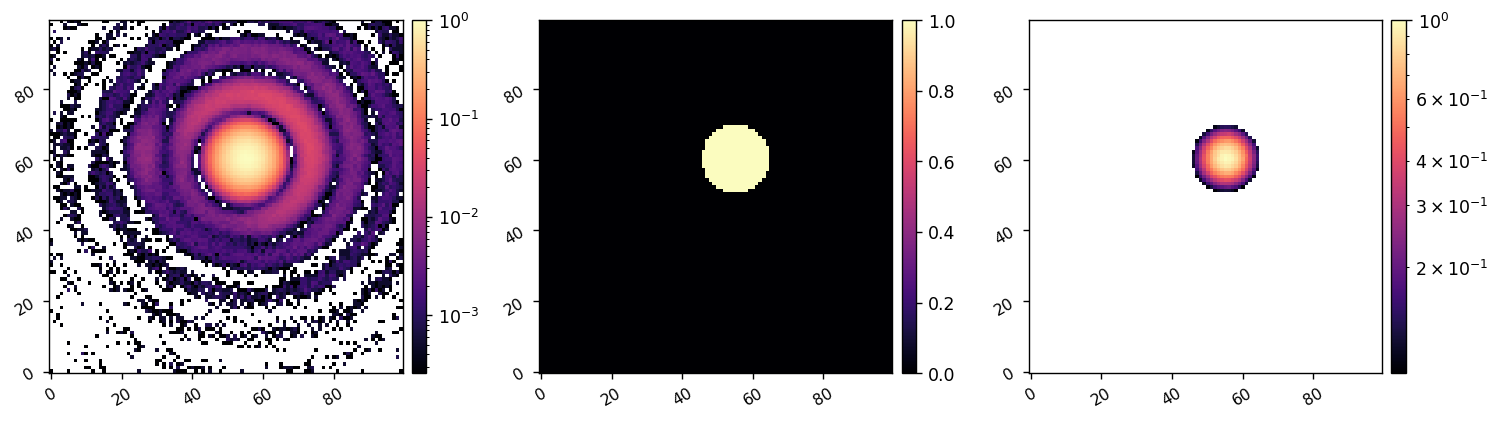

In [ ]:
date = 20241118
date = 20241119
freq = 3
data, hdr = utils.load_fits(f'data/sin-mod/{today}_fsm_mod_cube_0.5lamD_{freq:04d}.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)

times = np.linspace(0, data.shape[0]-1, data.shape[0]) / hdr['FPS']

shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

2.9705050892493325 1.655272009594536


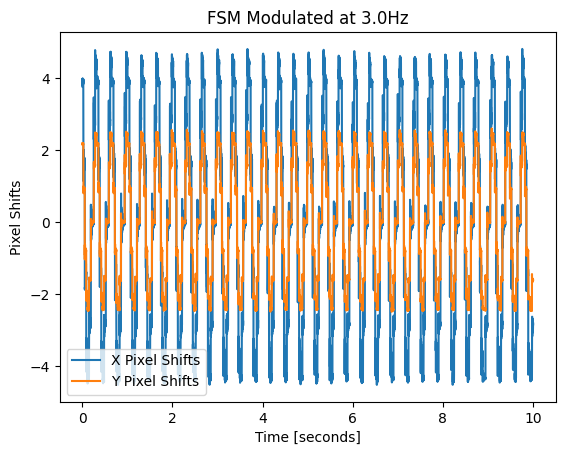

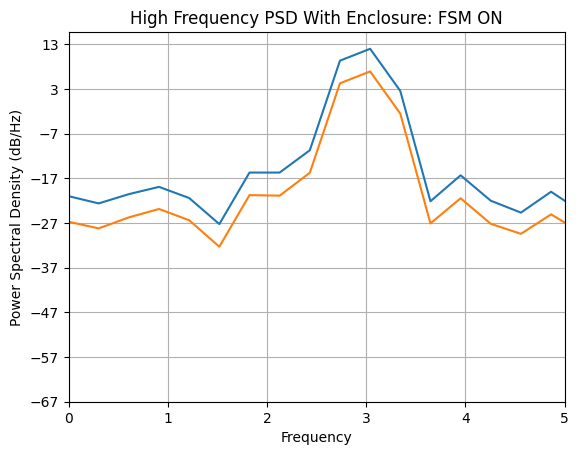

In [20]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(times, shift_pix[:,0], label='X Pixel Shifts')
plt.plot(times, shift_pix[:,1], label='Y Pixel Shifts')
plt.title(f'FSM Modulated at {freq:.1f}Hz')
plt.ylabel('Pixel Shifts')
plt.xlabel('Time [seconds]')
plt.legend()
plt.show()

py, psd_freqs = plt.psd(shift_pix[:,0], Fs=fps, NFFT=1024*4)
px, psd_freqs = plt.psd(shift_pix[:,1], Fs=fps, NFFT=1024*4)
plt.title('High Frequency PSD With Enclosure: FSM ON')
plt.xlim([0, 5])
# plt.ylim([-50, -30])
# plt.yticks([-50, -30])
plt.show()
